<a href="https://colab.research.google.com/github/nab-18/bayesian-mmm-test/blob/main/%5BNP%5D_Bayesian_MMM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bayesian Marketing Mix Model Test

Library imports

In [ ]:
!pip install pymc_marketing
!pip install pytimetk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 759.7/759.7 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadat

In [ ]:
!git clone https://github.com/pymc-labs/pymc-marketing
%ls
!git clone https://github.com/business-science/pytimetk
%ls


# Library imports

import pandas as pd
import numpy as np
import pytimetk as tk

from pymc_marketing.mmm.delayed_saturated_mmm import DelayedSaturatedMMM

import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt


Cloning into 'pymc-marketing'...
remote: Enumerating objects: 4021, done.
remote: Counting objects: 100% (1734/1734), done.
remote: Compressing objects: 100% (649/649), done.
remote: Total 4021 (delta 1328), reused 1294 (delta 1046), pack-reused 2287
Receiving objects: 100% (4021/4021), 210.17 MiB | 24.94 MiB/s, done.
Resolving deltas: 100% (2490/2490), done.
pymc-marketing/  pytimetk/  sample_data/
fatal: destination path 'pytimetk' already exists and is not an empty directory.
pymc-marketing/  pytimetk/  sample_data/


Data Import

In [ ]:
data = pd.read_csv("/content/sample_data/Copy of AKQA_ Data | MMM Mock Data - Apr 2024 - input_data.csv", parse_dates=['Date'])
data.tail()
# Data definitions
# - revenue - sales, target variable -> not in mock data
# - date
# - Conversions - Number of gained customers, sales, target variable
#  - Meta - Spend on Meta platform
#  - GAD Search - Spend on Google Ad search
#  - GAD Display - Spend on Google Ad display
#  - GAD Youtube - Spend on Youtube Ads
#  - DV360 DOOH - Spend on DV360 digital out of home
#  - DV360 Display - Spend on DV360 display
#  - DV360 Video - Spend on DV360 Video
#  - LinkedIn - Spend on LinkedIn ads
#  - Twitter - Spend on Twitter Ads
#  - TikTok - Spend on TikTok Ads

,Date,Conversions,Meta,GAD Search,GAD Display,GAD YouTube,DV360 DOOH,DV360 Display,DV360 Video,LinkedIn,Twitter,TikTok
41,2023-02-11,76,36544.19,63301.43,622.02,164394.36,42008.18,80255.27,0,38024.16,72436.16,18282.45
42,2023-02-12,90,36559.30,60392.48,928.06,159306.70,42306.84,80072.86,0,45034.27,78476.58,18564.92
43,2023-02-13,88,47537.32,62624.57,417.29,264783.20,54092.08,76636.46,0,30111.77,77113.46,18610.08
44,2023-02-14,81,59559.93,64465.21,2125.11,311737.65,57082.18,80964.58,0,56543.85,90291.14,17870.05
45,2023-02-15,80,59863.49,63980.42,16806.95,258649.51,54508.90,78936.83,0,88408.46,85734.63,12963.86


In [ ]:
# Make column names lower case

df = data.copy()
df.columns = [col.lower() for col in df.columns]

df.columns.tolist()


['date',
 'conversions',
 'meta',
 'gad search',
 'gad display',
 'gad youtube',
 'dv360 dooh',
 'dv360 display',
 'dv360 video',
 'linkedin',
 'twitter',
 'tiktok']

In [ ]:
# Visualise spend and revenue by marketing channels -> COMPLETE THIS CODE SNIPPET

df \
    .melt(
        id_vars=["date"],
        value_vars=["conversions", "meta", "gad search", "gad display", "gad youtube", "dv360 dooh", "dv360 display", "dv360 video", "linkedin", "twitter", "tiktok"]) \
        .groupby("variable") \
        .plot_timeseries(
            "date", "value",
            color_column="variable",
            facet_ncol = 2,
            width = 600,
            height = 800,
            legend_show = False
        )

Exploratory analysis

In [ ]:
# Complete code here ->

# Total spend and revenue analysis

total_spend = df[[]].sum(axis=0).sum()
total_revenue = df[].sum()

spend_revenue_ratio = total_revenue / total_spend
print(spend_revenue_ratio)

# Monthly Ad Spend Analysis ->


SyntaxError: invalid syntax (<ipython-input-6-aa02967e3d27>, line 6)

Pre-processing: Feature engineering

In [ ]:
# Time series features

df_features = df \
  .assign(
      year = lambda x: x["date"].dt.year,
      month = lambda x: x["date"].dt.month,
      dayofyear = lambda x: x["date"].dt.dayofyear,
  ) \
  .assign(
      trend = lambda x: df.index,
  )

df_features = df_features[["date", "conversions", "meta", "gad search", "gad display", "gad youtube", "dv360 dooh", "dv360 display", "dv360 video", "linkedin", "twitter", "tiktok", "trend", "year", "month", "dayofyear"]]

df_features.glimpse()

<class 'pandas.core.frame.DataFrame'>: 46 rows of 16 columns
date:           datetime64[ns]    [Timestamp('2023-01-01 00:00:00'), Tim ...
conversions:    int64             [1, 3, 15, 25, 23, 15, 16, 18, 16, 20, ...
meta:           float64           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0. ...
gad search:     float64           [3938.43, 3847.24, 52881.25, 93751.13, ...
gad display:    float64           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0. ...
gad youtube:    float64           [43819.44, 46154.94, 47272.88, 49120.3 ...
dv360 dooh:     float64           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0. ...
dv360 display:  float64           [1010.6, 2416.02, 3952.75, 3445.14, 18 ...
dv360 video:    int64             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ...
linkedin:       float64           [1269.51, 2353.71, 4587.19, 7964.12, 3 ...
twitter:        float64           [44350.27, 45188.92, 46921.78, 49869.2 ...
tiktok:         float64           [7066.17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ...
trend:         

Model Setup

In [ ]:
# References from PyMC3 here ->

# DelayedSaturationsMMM -> Scaling
# MaxAbsScaler from Scikitlearn
# Specify priors in scaled space -> Adjust every run?
# Value between 0 and 1
# Can also use spend / max spend as the prior

# Create priors

total_spend_per_channel = df_features[["meta", "gad search", "gad display", "gad youtube", "dv360 dooh", "dv360 display", "dv360 video", "linkedin", "twitter", "tiktok"]].sum(axis=0)

spend_proportion = total_spend_per_channel / total_spend_per_channel.sum()

HALFNORMAL_SCALE = 1 / np.sqrt(1 - 2 / np.pi)

n_channels = 5

prior_sigma = HALFNORMAL_SCALE * n_channels * spend_proportion
prior_sigma.tolist()

[0.5471919896406486,
 1.4395810676486653,
 0.019870434874333875,
 2.71324552830667,
 0.35740367953734875,
 0.7994665826238144,
 0.0,
 0.8847737255850857,
 1.4630907781105356,
 0.06985991352442802]

In [ ]:
# Create a model specification

X = df_features.drop("conversions",axis=1)
y = df_features["conversions"]

# Default Model configuration

dummy_model = DelayedSaturatedMMM(
    date_column = "date",
    channel_columns = ["meta", "gad search", "gad display", "gad youtube", "dv360 dooh", "dv360 display", "dv360 video", "linkedin", "twitter", "tiktok"],
    control_columns = [
        "trend",
        "year",
        "month",
    ],
    adstock_max_lag=8
)

dummy_model.default_model_config

{'intercept': {'dist': 'Normal', 'kwargs': {'mu': 0, 'sigma': 2}},
 'beta_channel': {'dist': 'HalfNormal', 'kwargs': {'sigma': 2}},
 'alpha': {'dist': 'Beta', 'kwargs': {'alpha': 1, 'beta': 3}},
 'lam': {'dist': 'Gamma', 'kwargs': {'alpha': 3, 'beta': 1}},
 'likelihood': {'dist': 'Normal',
  'kwargs': {'sigma': {'dist': 'HalfNormal', 'kwargs': {'sigma': 2}}}},
 'gamma_control': {'dist': 'Normal', 'kwargs': {'mu': 0, 'sigma': 2}},
 'gamma_fourier': {'dist': 'Laplace', 'kwargs': {'mu': 0, 'b': 1}}}

In [ ]:
# Customising model configuration -> Default works well, so come back to this since its not pressing
# Go back into HelloFresh YT video to get recommended distributions

my_model_config = {
    'intercept': {
        'dist': 'Normal',
        'kwargs': {
            'mu': 0,
            'sigma': 2
        }
    },
    'beta_channel': {
        'dist': 'HalfNormal',
        'kwargs': {
            'sigma': 2
        }
    },
    "likelihood": {
        "dist": "Normal",
        "kwargs":{
            "sigma":{
                'dist': 'HalfNormal',
                'kwargs': {
                    'sigma': 2
                }
            }
        }
    },
    'alpha': {
        'dist': 'Beta',
        'kwargs': {'alpha': 1, 'beta': 3}
    },
    'lam': {
        'dist': 'Gamma',
        'kwargs': {'alpha': 3, 'beta': 1}
    },
    'gamma_control': {
        'dist': 'Normal',
        'kwargs': {'mu': 0, 'sigma': 2}
    },
    'gamma_fourier': {
        'dist': 'Laplace',
        'kwargs': {'mu': 0, 'b': 1}
    },
}
my_sampler_config = {
    "progressbar": True,
    "cores": 1,
}



In [ ]:
# DelayedSaturatedMMM Model

mmm = DelayedSaturatedMMM(
    model_config = my_model_config,
    sampler_config = my_sampler_config,
    date_column = "date",
    channel_columns = ["meta", "gad search", "gad display", "gad youtube", "dv360 dooh", "dv360 display", "dv360 video", "linkedin", "twitter", "tiktok"],
    control_columns = [
        "trend",
        "year",
        "month",
    ],
    adstock_max_lag=8,
    yearly_seasonality=2
)

mmm.model_config

mmm.default_model_config

{'intercept': {'dist': 'Normal', 'kwargs': {'mu': 0, 'sigma': 2}},
 'beta_channel': {'dist': 'HalfNormal', 'kwargs': {'sigma': 2}},
 'alpha': {'dist': 'Beta', 'kwargs': {'alpha': 1, 'beta': 3}},
 'lam': {'dist': 'Gamma', 'kwargs': {'alpha': 3, 'beta': 1}},
 'likelihood': {'dist': 'Normal',
  'kwargs': {'sigma': {'dist': 'HalfNormal', 'kwargs': {'sigma': 2}}}},
 'gamma_control': {'dist': 'Normal', 'kwargs': {'mu': 0, 'sigma': 2}},
 'gamma_fourier': {'dist': 'Laplace', 'kwargs': {'mu': 0, 'b': 1}}}

Model Fitting

In [ ]:
# Fit Model

mmm.fit(X, y, target_accept = 0.95, random_seed = 888)

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data
	> fit_data

Model Visualisation

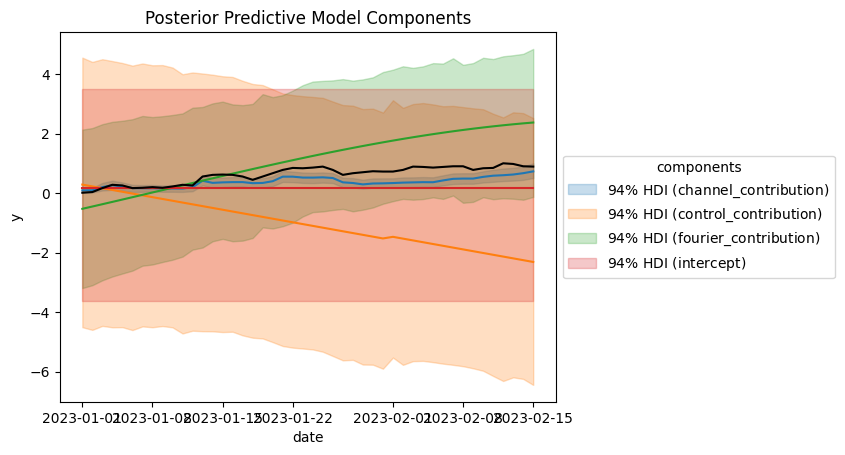

In [ ]:
# Components Contribution Curves

fig = mmm.plot_components_contributions()

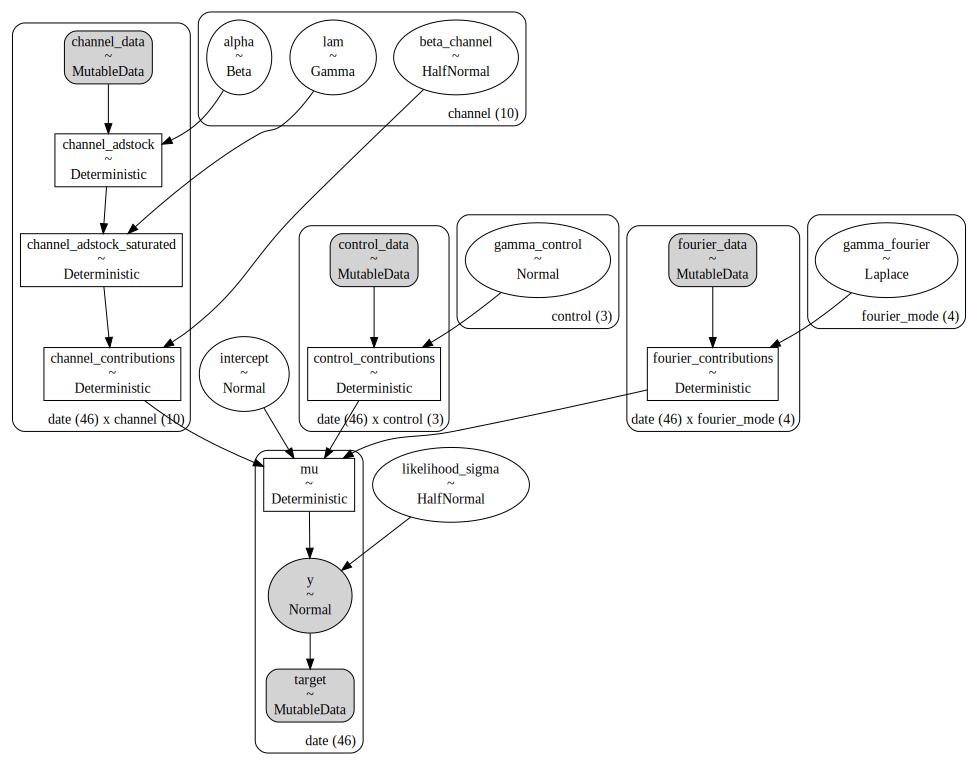

In [ ]:
# Grpahical Process

fig = mmm.graphviz()
fig

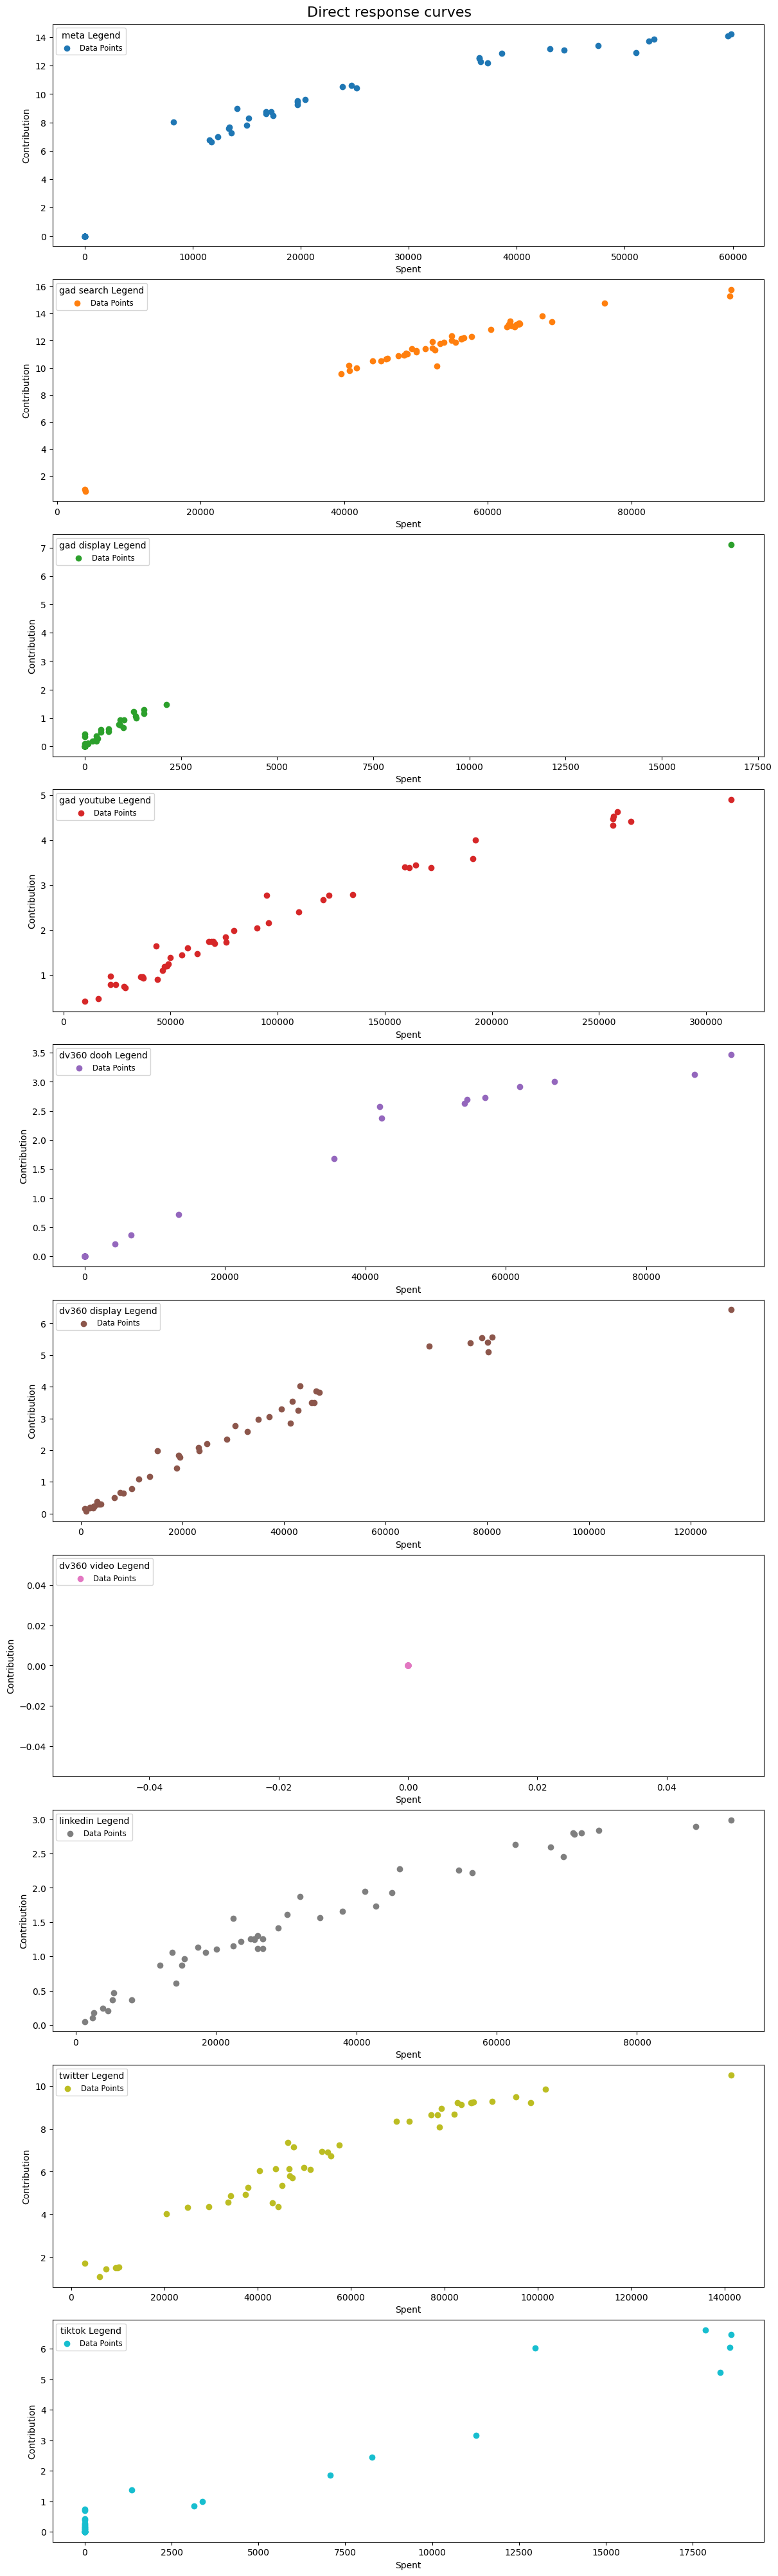

In [ ]:
# Direct Contribution Curves

fig = mmm.plot_direct_contribution_curves()

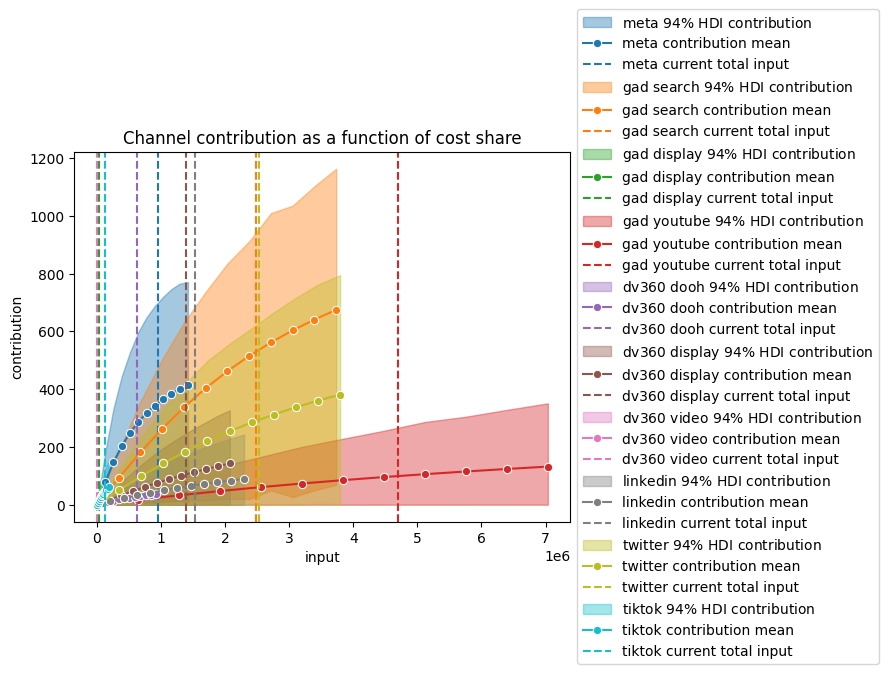

In [ ]:
# Channel Contributions -> Consider writing code to incorporate Shapley instead

fig = mmm.plot_channel_contributions_grid(start=0, stop=1.5,num=12, absolute_xrange=True);

Return on Ad Spend

In [ ]:
# By Channel

get_mean_contributions_over_time_df = mmm.compute_mean_contributions_over_time(original_scale=True)

channel_contribution_original_scale = mmm.compute_channel_contribution_original_scale()


roas_samples = (
    channel_contribution_original_scale.stack(sample=
        ("chain", "draw")).sum("date")
        / X[["meta", "gad search", "gad display", "gad youtube", "dv360 dooh", "dv360 display", "dv360 video", "linkedin", "twitter", "tiktok"]].sum().to_numpy()[..., None]
)

roas_samples

<xarray.DataArray (channel: 10, sample: 2000)>
array([[2.73952578e-04, 3.07482825e-04, 1.75403366e-04, ...,
        2.44266456e-04, 3.01184187e-04, 2.77922592e-04],
       [1.00665851e-04, 8.39038503e-05, 1.44784179e-04, ...,
        2.11597944e-04, 1.50431122e-04, 1.44577418e-04],
       [1.10848098e-03, 1.14583566e-03, 1.20693919e-04, ...,
        2.63377738e-05, 1.44539516e-04, 1.84989146e-04],
       ...,
       [1.17835671e-04, 1.27568092e-04, 2.49150806e-05, ...,
        5.94690190e-06, 9.86123775e-05, 9.27053778e-05],
       [1.01034550e-04, 1.11569354e-04, 1.58458427e-04, ...,
        1.30566890e-04, 1.06555896e-04, 1.00128164e-04],
       [9.36348095e-05, 8.65042974e-05, 7.46137064e-05, ...,
        6.08988079e-04, 3.16666138e-04, 3.22623840e-04]])
Coordinates:
  * channel  (channel) <U13 'meta' 'gad search' ... 'twitter' 'tiktok'
  * sample   (sample) object MultiIndex
  * chain    (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1 1
  * draw     (sample) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999

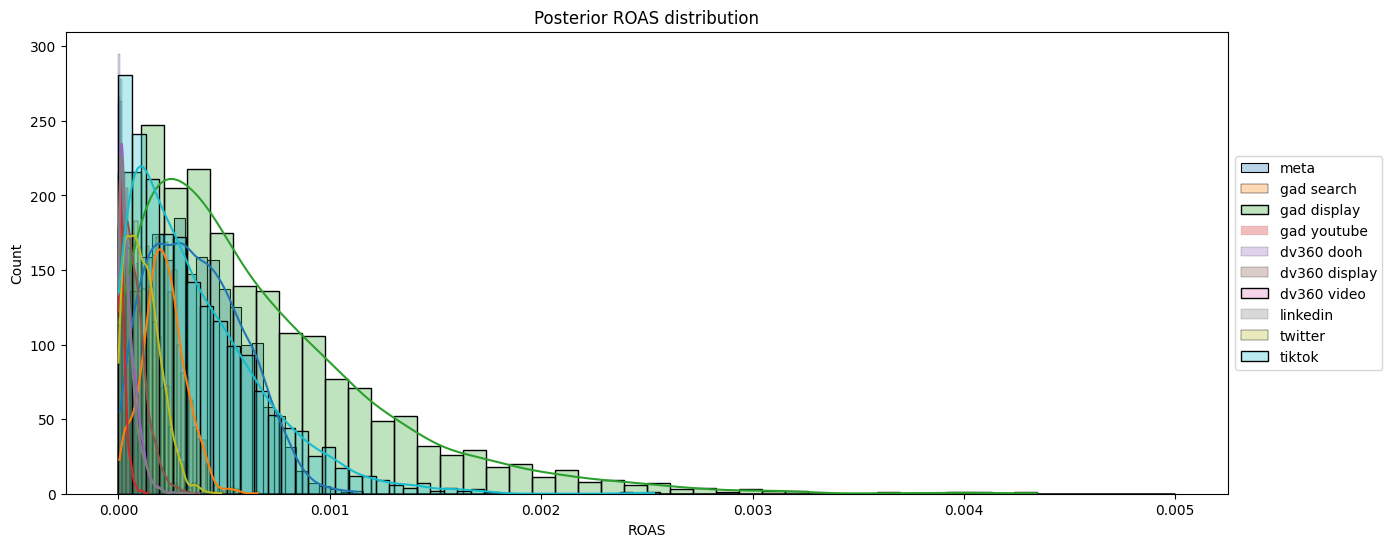

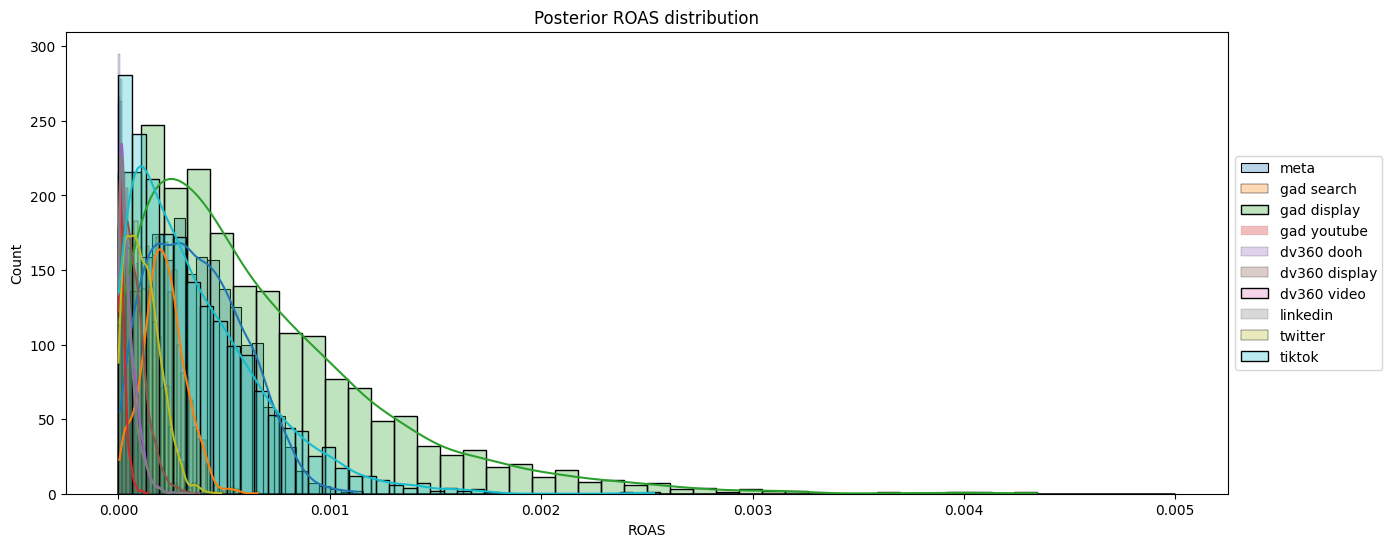

In [ ]:
# Visualise

fig, ax = plt.subplots(figsize=(15, 6))
for channel in ["meta", "gad search", "gad display", "gad youtube", "dv360 dooh", "dv360 display", "dv360 video", "linkedin", "twitter", "tiktok"]:
  sns.histplot(
      roas_samples.sel(channel=channel).to_numpy(), binrange=(0,0.005) ,alpha=0.3, kde=True, ax=ax, legend=True, label = channel
  )
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set(title="Posterior ROAS distribution", xlabel="ROAS")
fig

In [ ]:
# ROAS Summary

roas_df = roas_samples.to_dataframe(name="roas")

roas_df.groupby("channel").mean()
roas_df.groupby("channel")['roas'].describe(percentiles=[0.025, 0.975])

,count,mean,std,min,2.5%,50%,97.5%,max
channel,,,,,,,,
dv360 display,2000.0,0.000076,0.000057,8.838264e-08,3.567940e-06,0.000065,0.000219,0.000374
dv360 dooh,2000.0,0.000046,0.000042,1.478068e-08,1.518249e-06,0.000034,0.000150,0.000384
dv360 video,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gad display,2000.0,0.000662,0.000578,3.114116e-07,2.032870e-05,0.000504,0.002169,0.004344
gad search,2000.0,0.000213,0.000099,4.020684e-06,2.577718e-05,0.000209,0.000413,0.000657
gad youtube,2000.0,0.000021,0.000019,3.025486e-08,8.157588e-07,0.000016,0.000071,0.000139
linkedin,2000.0,0.000044,0.000042,3.536041e-08,1.736514e-06,0.000032,0.000150,0.000356
meta,2000.0,0.000371,0.000216,6.321096e-06,3.505895e-05,0.000350,0.000806,0.001128
tiktok,2000.0,0.000369,0.000317,1.540612e-06,1.406571e-05,0.000288,0.001163,0.002533


Response Curves

ValueError: Each lower bound must be strictly less than each upper bound.

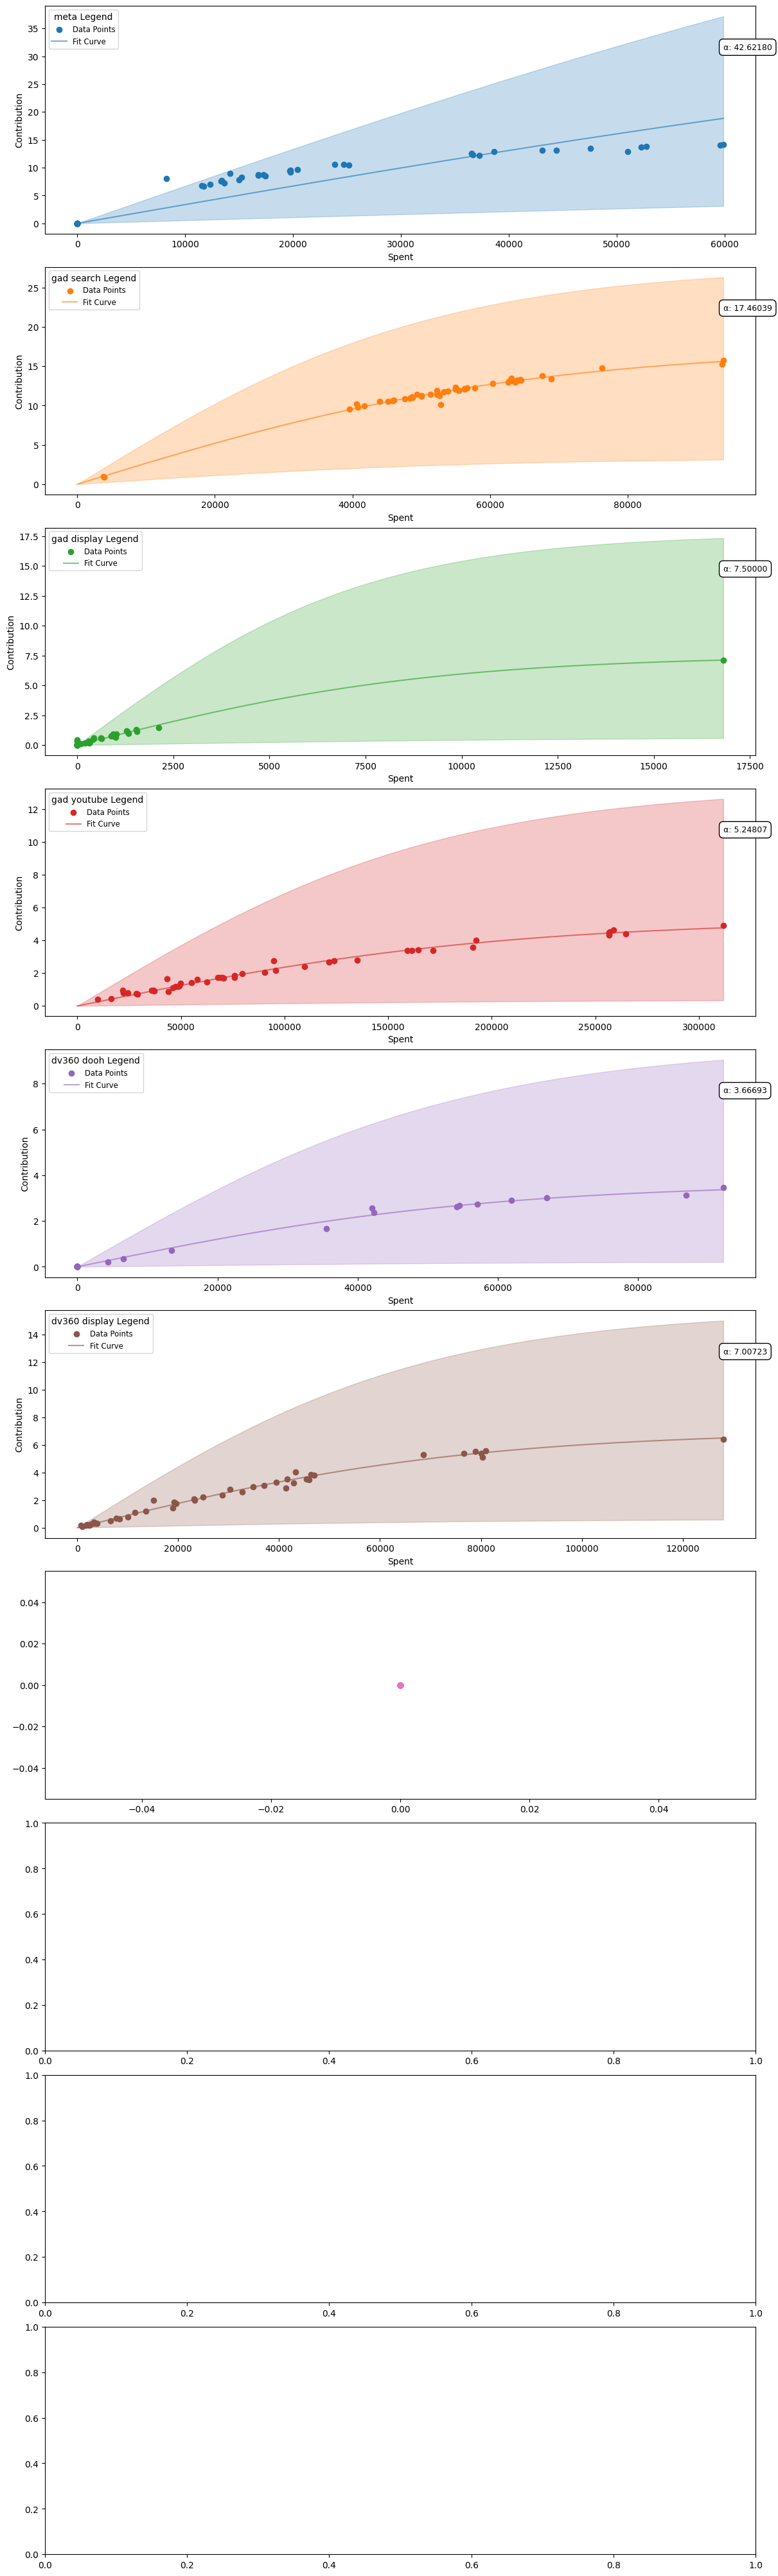

In [ ]:
# Sigmoid shown
sigmoid_response_curve_fig = mmm.plot_direct_contribution_curves(show_fit=True)

# Unsure what the issue with sigmoid method is, Michaelis-Menten plots fine

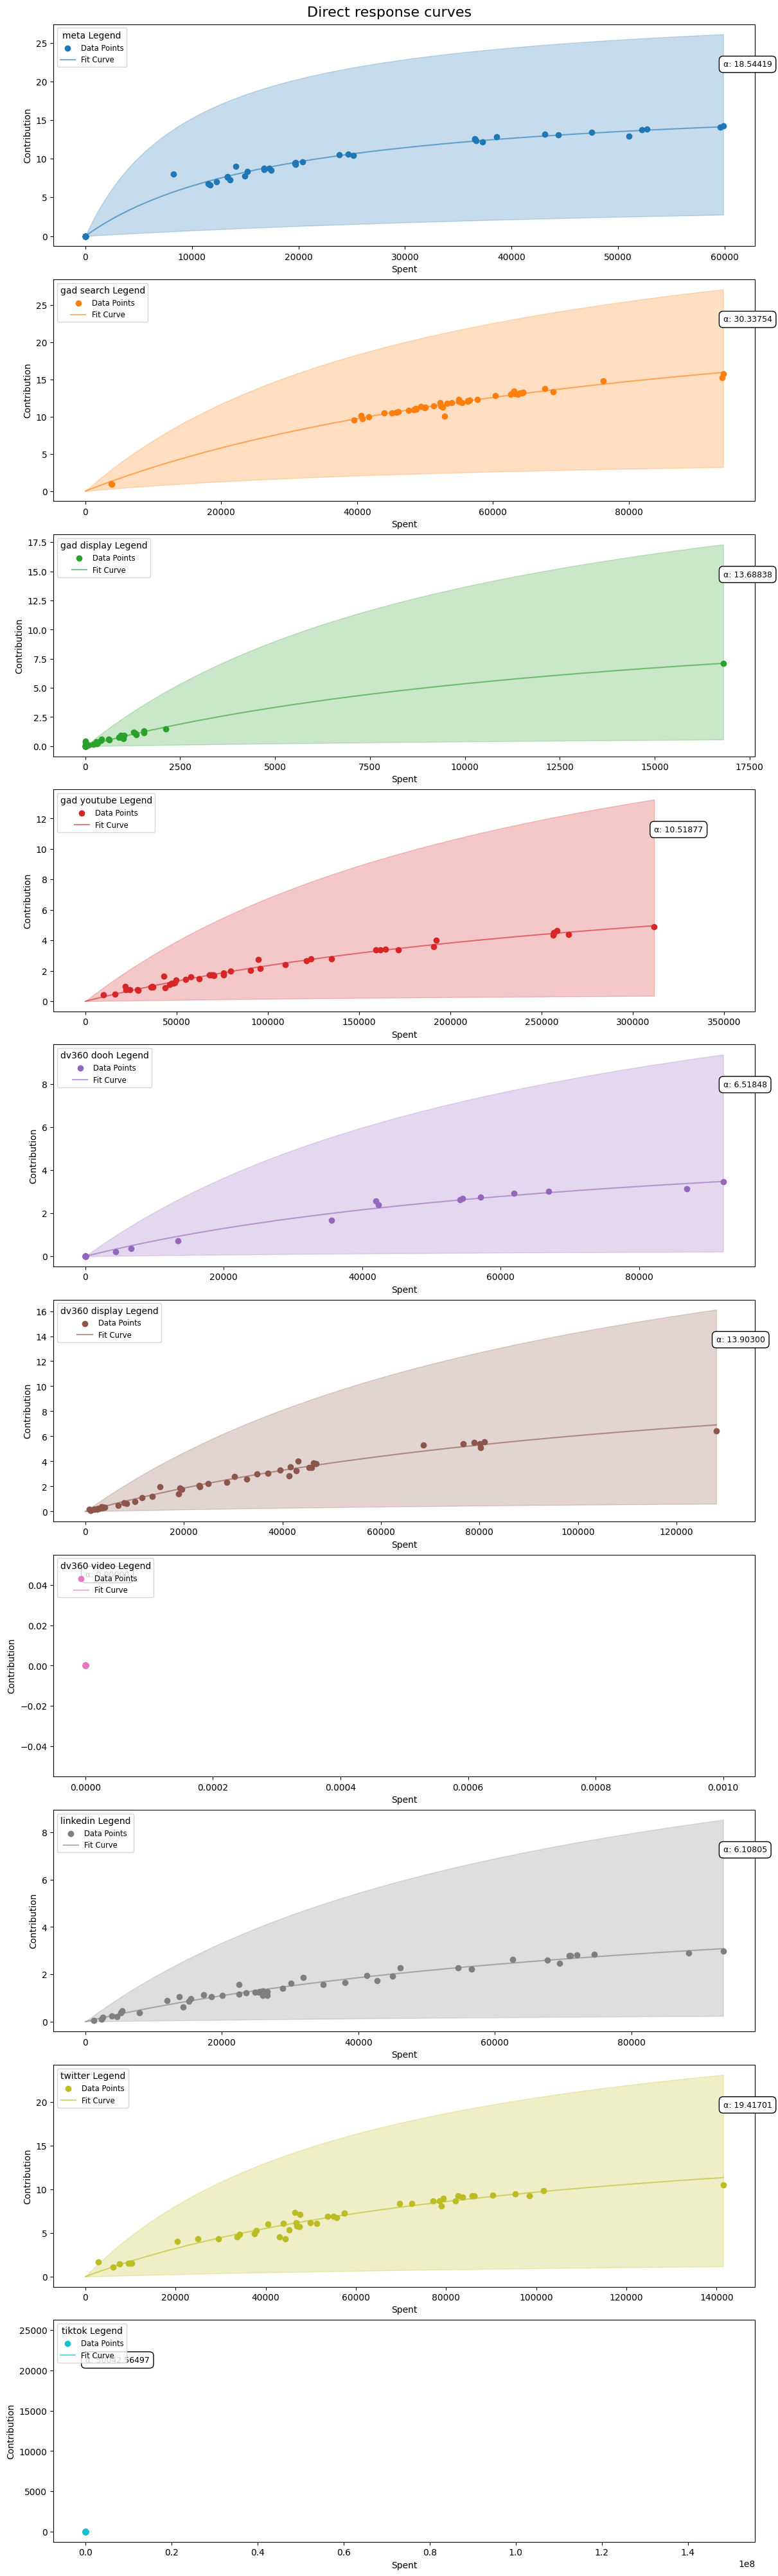

In [ ]:
# Michaelis-Menten
sigmoid_response_curve_fig = mmm.plot_direct_contribution_curves(show_fit=True, method='michaelis-menten')